<a href="https://colab.research.google.com/github/mnocerino23/NBA-Player-Classifier/blob/main/NBA_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

nba = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/NBA_2021-2022_Stats_Clean.csv')

Mounted at /content/drive


In [2]:
nba.head()

,Player,Position,Age,Team,G,GS,MP,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,18.5,0.4,2.1,2.5,0.070,-2.0,-0.6,-2.6,-0.2,2.840160
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,12.0,3.8,3.0,6.8,0.163,1.0,1.0,2.0,2.0,17.926829
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,25.0,3.6,3.5,7.2,0.188,1.7,2.1,3.8,2.7,30.351780
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,18.4,-0.1,0.4,0.3,0.044,-4.2,-1.5,-5.7,-0.3,2.094120
4,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,...,24.1,-1.1,1.1,0.1,0.003,-1.8,-1.1,-2.9,-0.3,5.009633


# Remove player name, team, and one hot encode position

In [3]:
nba = nba.drop(['Player', 'Team'], axis = 1)

In [4]:
dummy_position = pd.get_dummies(nba['Position'], prefix = 'pos')

nba = pd.merge(left = nba, right = dummy_position, left_index = True, right_index = True)
nba = nba.drop(columns = ['Position'], axis = 1)

In [5]:
nba

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,OBPM,DBPM,BPM,VORP,Salary,pos_C,pos_PF,pos_PG,pos_SF,pos_SG
0,22,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,...,-2.0,-0.6,-2.6,-0.2,2.840160,1,0,0,0,0
1,28,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,...,1.0,1.0,2.0,2.0,17.926829,1,0,0,0,0
2,24,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,...,1.7,2.1,3.8,2.7,30.351780,1,0,0,0,0
3,21,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,...,-4.2,-1.5,-5.7,-0.3,2.094120,0,1,0,0,0
4,23,65,21,22.6,3.9,10.5,0.372,1.6,5.2,0.311,...,-1.8,-1.1,-2.9,-0.3,5.009633,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,26,68,67,30.8,6.5,12.9,0.501,1.9,4.9,0.390,...,2.1,-0.4,1.6,1.9,14.317459,1,0,0,0,0
389,29,77,8,18.9,1.6,3.5,0.454,0.6,1.5,0.379,...,-0.2,2.4,2.2,1.6,7.804878,0,0,0,0,1
390,33,52,1,16.3,2.7,5.2,0.518,0.3,0.9,0.354,...,0.1,2.1,2.2,0.9,8.000000,0,1,0,0,0
391,23,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,...,7.1,-2.0,5.2,4.8,37.096500,0,0,1,0,0


In [6]:
nba.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Salary', 'pos_C',
       'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG'],
      dtype='object')

In [7]:
#split the features into three different dataframes so that we can create a readable heat map for each set of features to see how each correlates to salary

In [8]:
nba_feature_set1 = nba[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%','Salary']]
nba_feature_set2 = nba[['FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'Salary']]
nba_feature_set3 = nba[['TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'pos_C',
       'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG', 'Salary']]

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

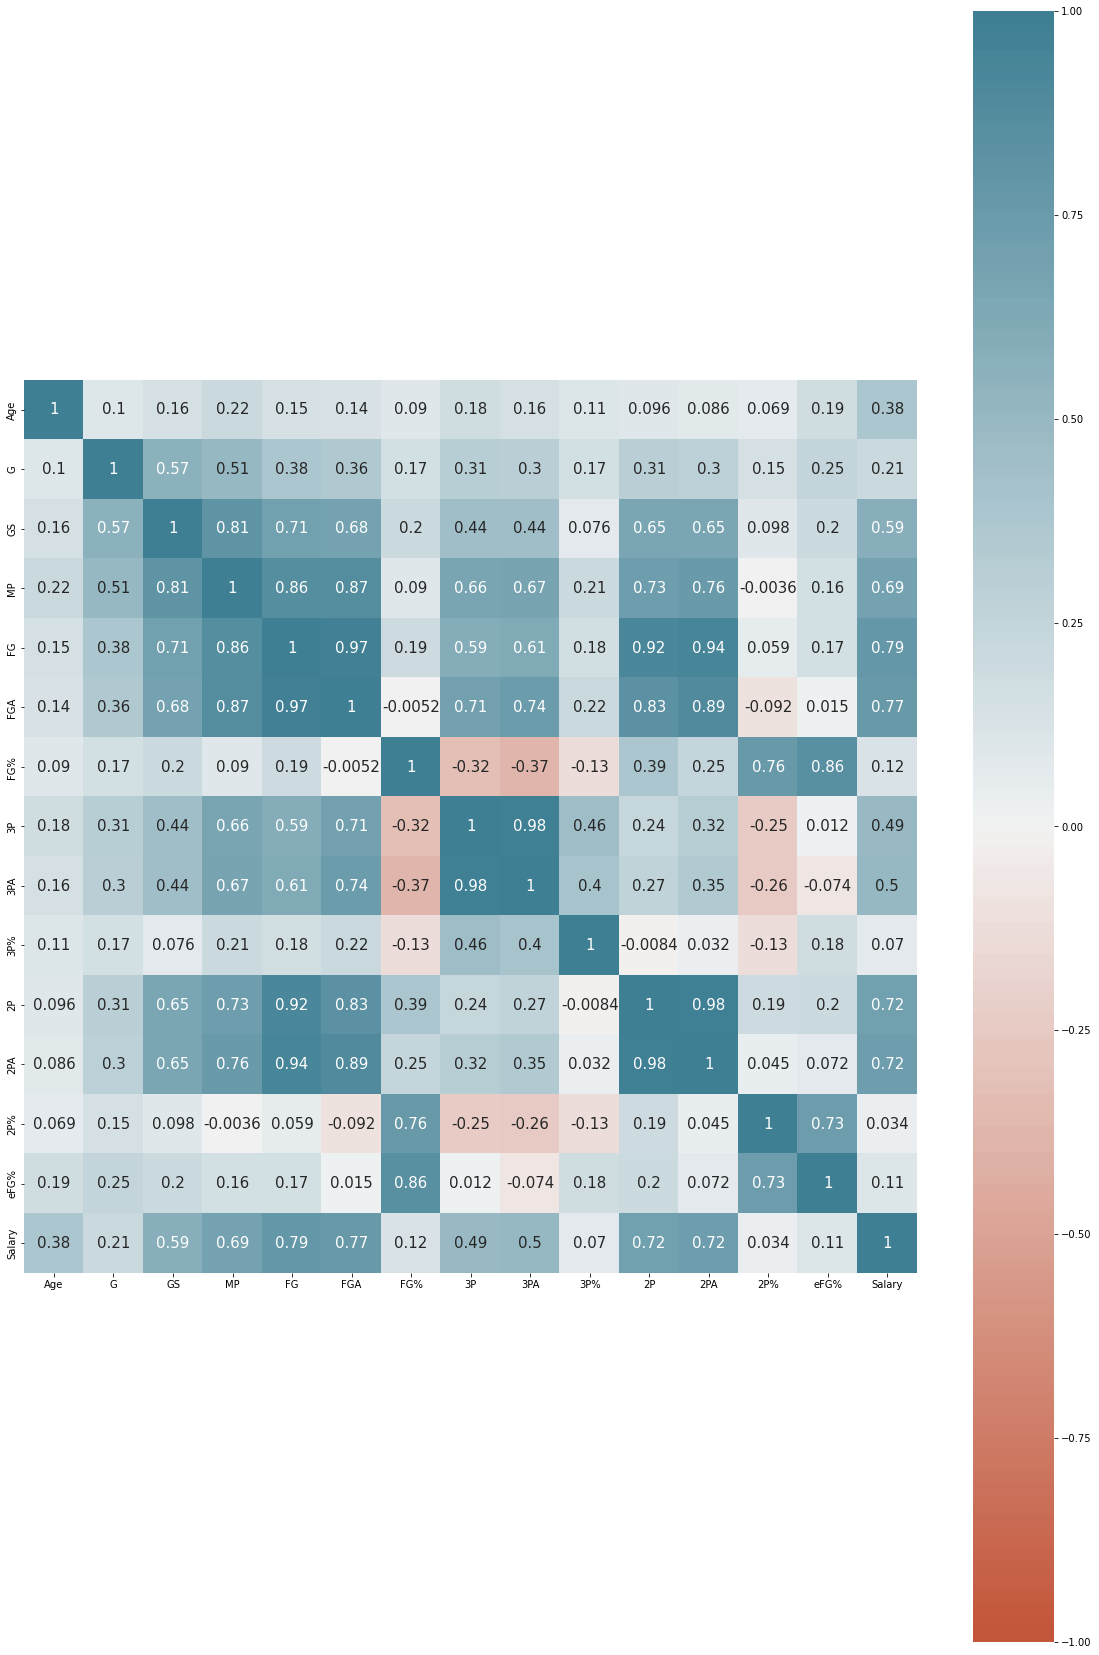

In [10]:
#Use seaborn's heatmap to investigate relationships between the variables
plt.subplots(figsize = (20,30))
sns.heatmap(nba_feature_set1.corr(), 
            vmin = -1,
            vmax = 1, 
            center = 0,
            cmap = sns.diverging_palette(20,220,n = 200),
            annot = True, annot_kws = {'size': 15},
            square = True
            )

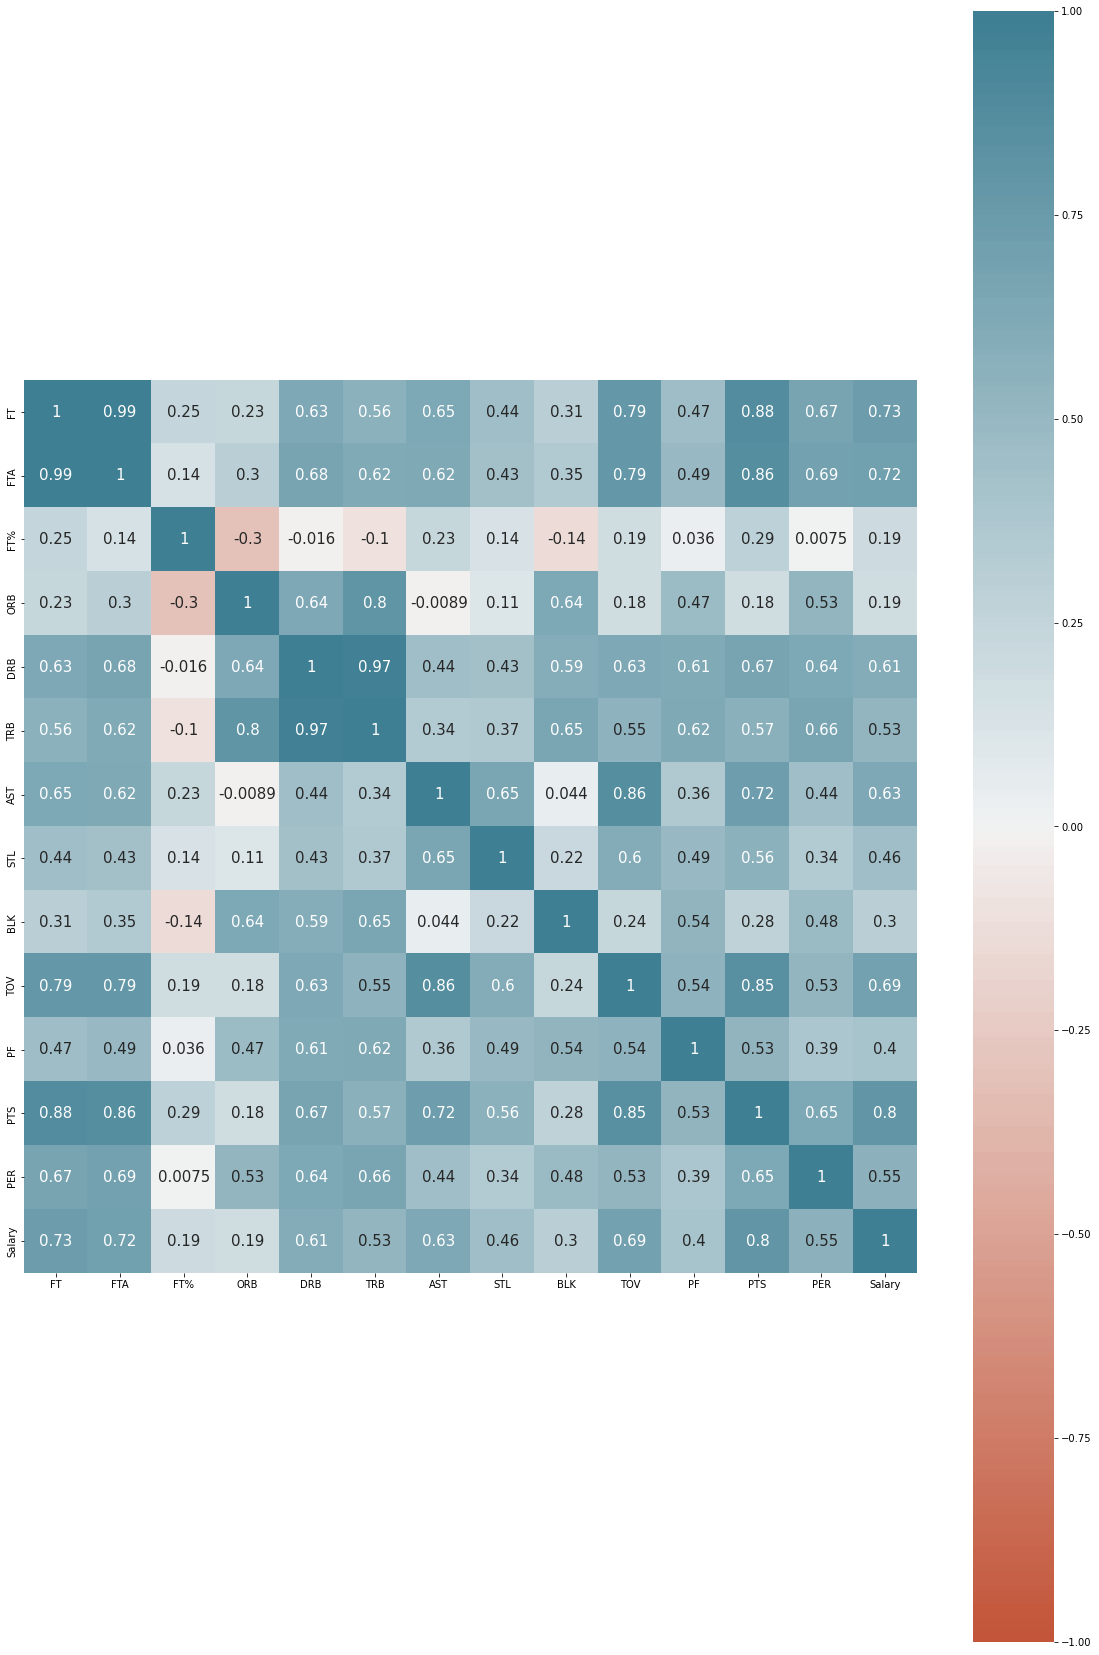

In [11]:
#Use seaborn's heatmap to investigate relationships between the variables
plt.subplots(figsize = (20,30))
sns.heatmap(nba_feature_set2.corr(), 
            vmin = -1,
            vmax = 1, 
            center = 0,
            cmap = sns.diverging_palette(20,220,n = 200),
            annot = True, annot_kws = {'size': 15},
            square = True
            )

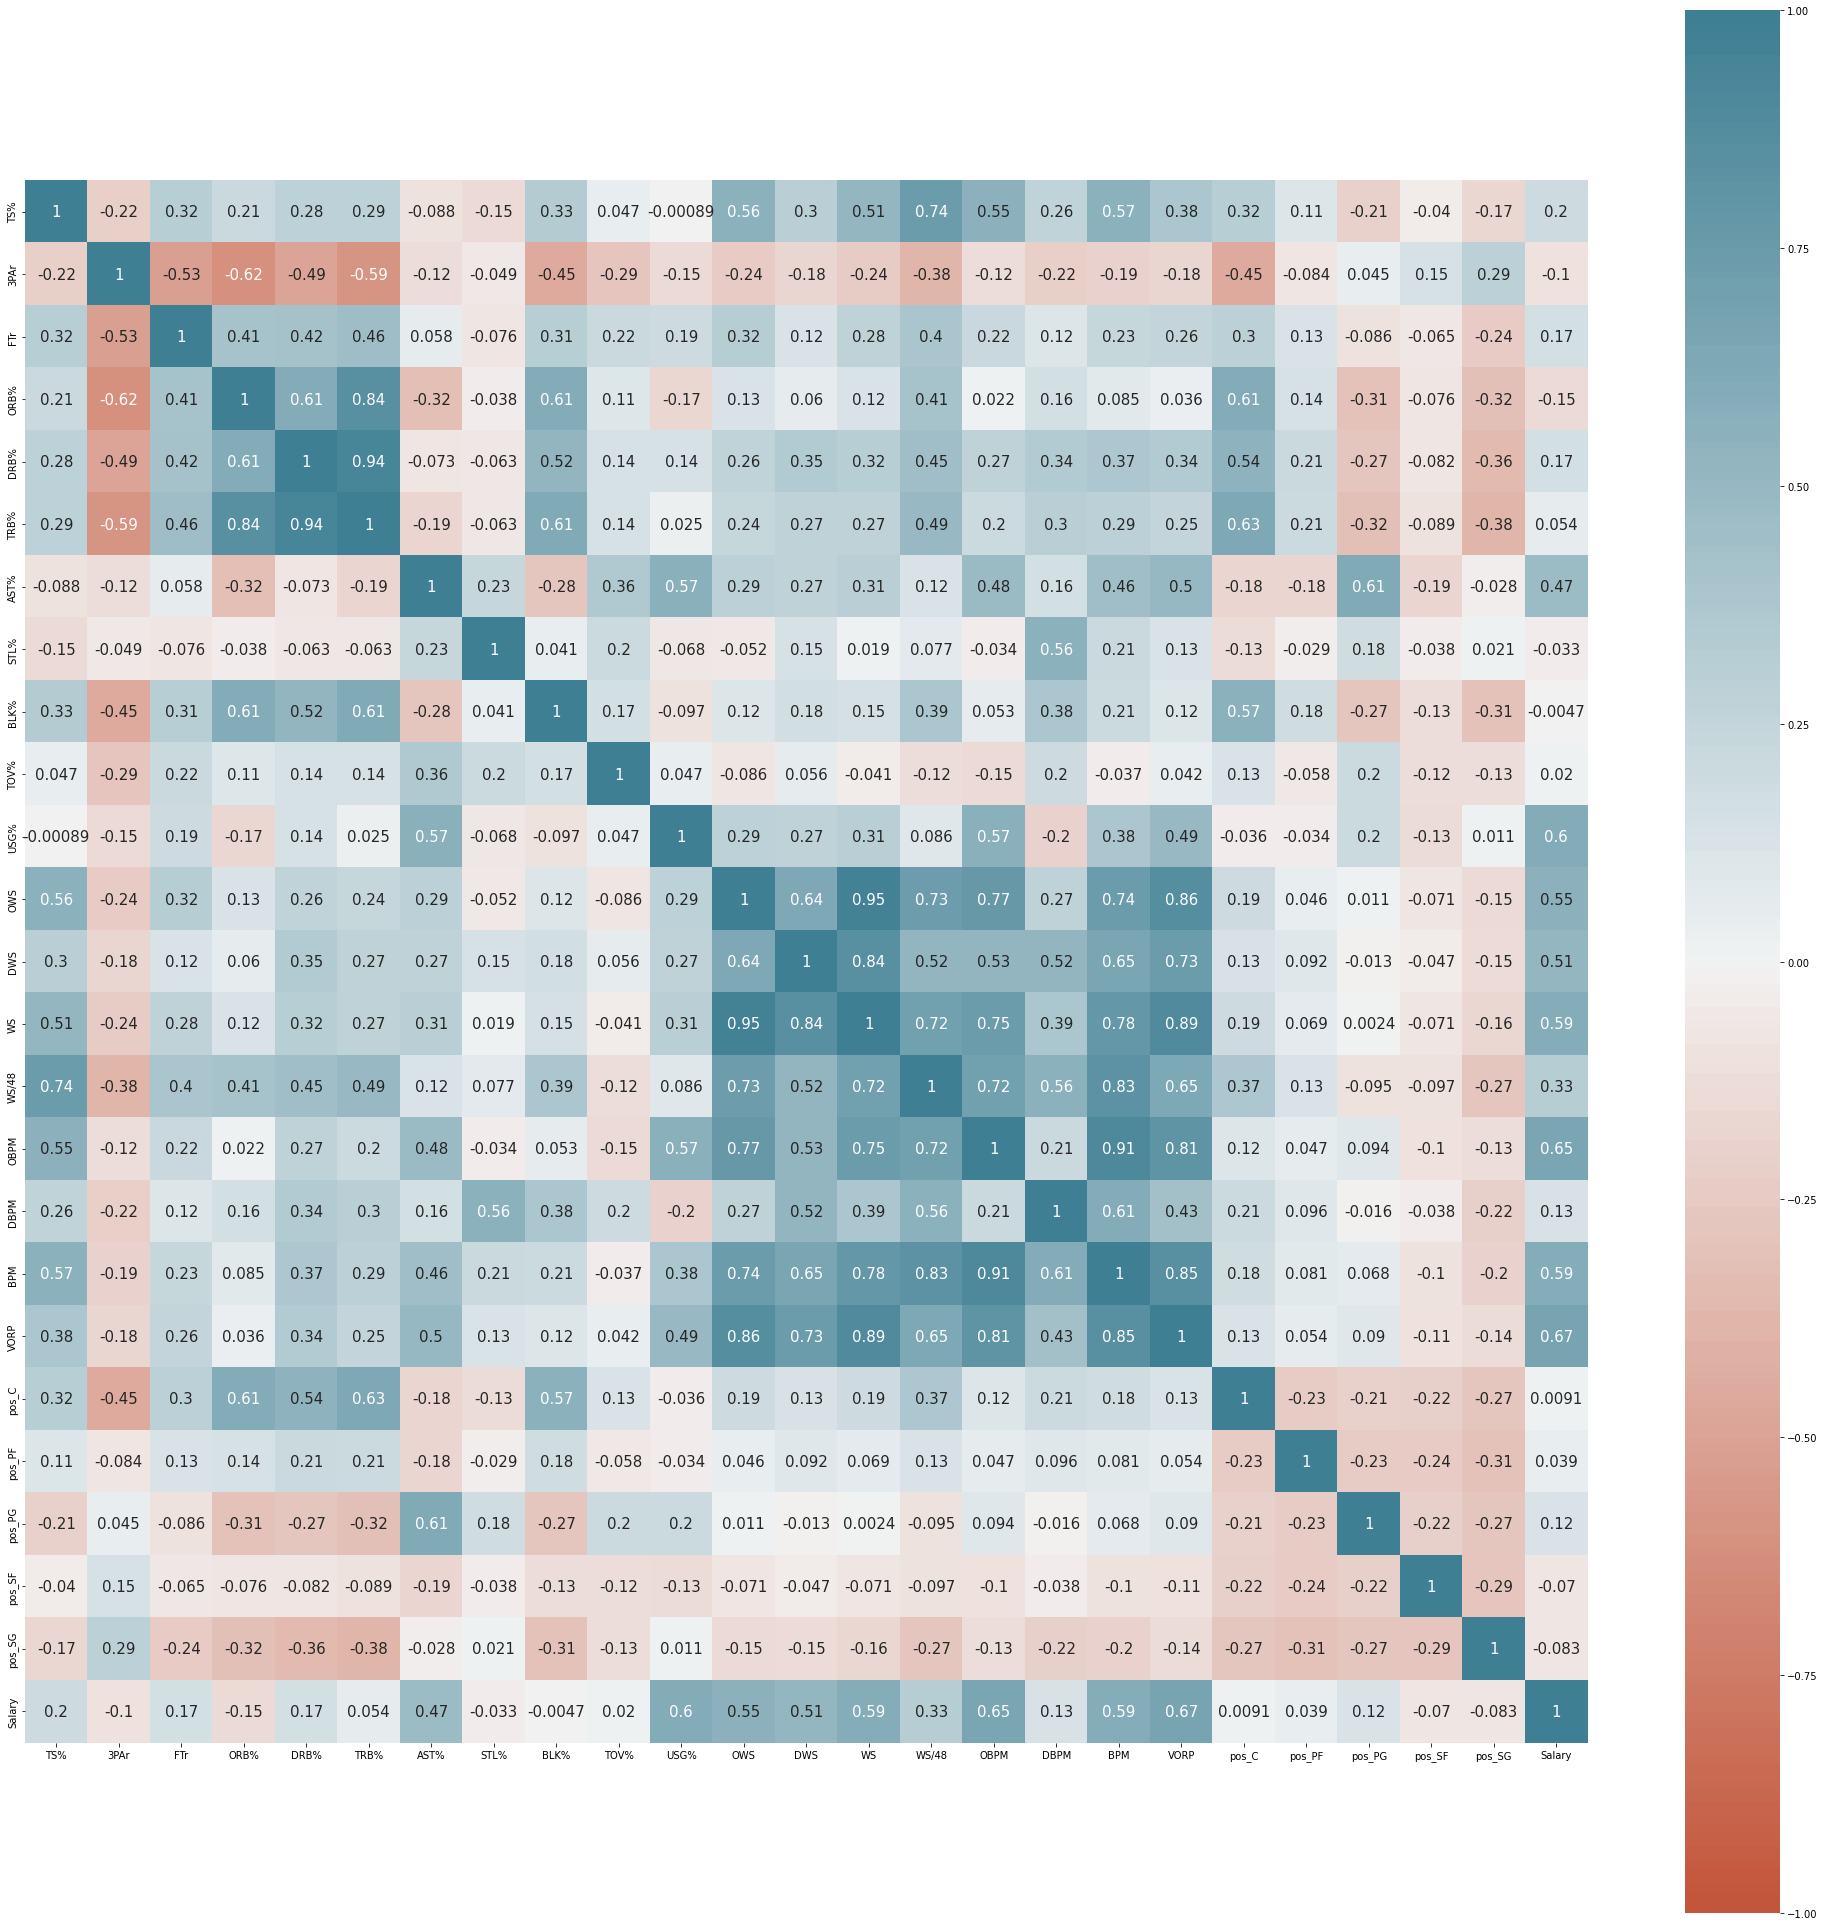

In [12]:
#Use seaborn's heatmap to investigate relationships between the variables
plt.subplots(figsize = (35,35))
sns.heatmap(nba_feature_set3.corr(), 
            vmin = -1,
            vmax = 1, 
            center = 0,
            cmap = sns.diverging_palette(20,220,n = 200),
            annot = True, annot_kws = {'size': 15},
            square = True
            )

In [13]:
#shuffle dataset to get rid of any predefined order
nba = nba.sample(frac=1).reset_index(drop=True)

Split into Training and testing data

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

nba_train, nba_test = train_test_split(nba, test_size = 0.2, random_state = 5)

In [17]:
print('Train:')
print('Train dataset dimensions: ', nba_train.shape, '\n')

print('Test:')
print('Test dataset dimensions: ', nba_test.shape, '\n')

Train:
Train dataset dimensions:  (314, 52) 

Test:
Test dataset dimensions:  (79, 52) 



In [18]:
nba_train.to_csv('nba_train.csv', index = False)
nba_test.to_csv('nba_test.csv', index = False)